In [30]:
import pandas as pd
import matplotlib as plt

In [31]:
df = pd.read_csv("/Users/derekvasquez/Desktop/IS2053-Project/Space Corrected.csv")

Top 10 Companies by Launch Count-This chart shows that RVSN USSR is by far the most active launcher historically, with legacy aerospace agencies dominating the top 10.

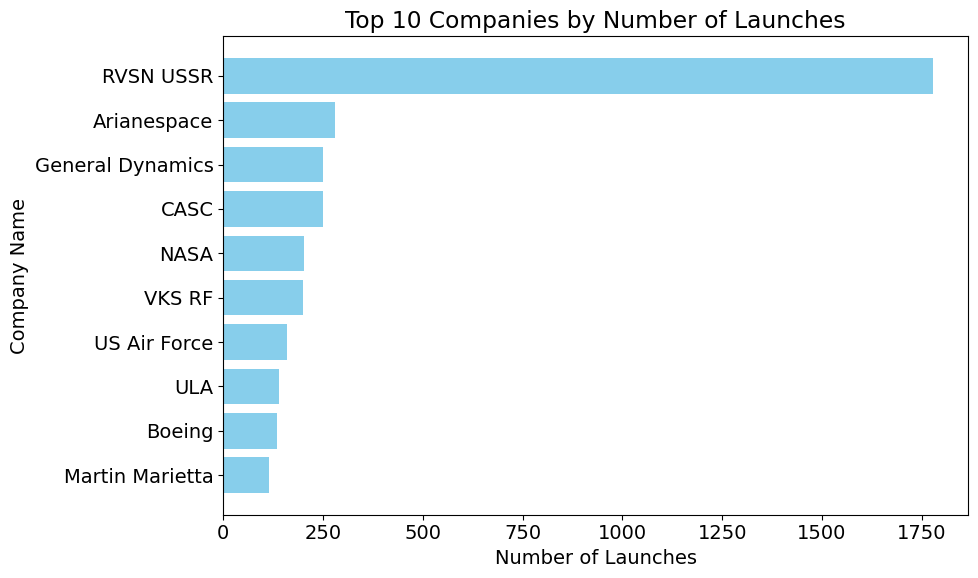

In [46]:
import matplotlib.pyplot as plt

launches_by_company = df['Company Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(launches_by_company.index, launches_by_company.values, color='skyblue')
plt.title("Top 10 Companies by Number of Launches")
plt.xlabel("Number of Launches")
plt.ylabel("Company Name")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

Launches Over Time-
This line graph reveals a surge in launches during the 1960s and 1970s, a steep decline through the 1990s, and a steady climb again after 2010 which respresents the new spark of space exploration we have now. 

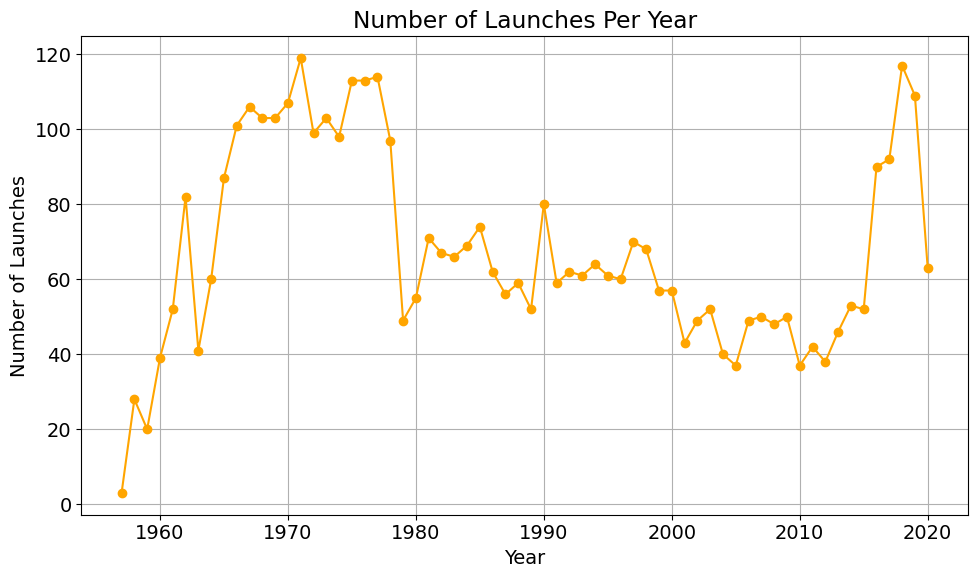

In [47]:
launches_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(launches_per_year.index, launches_per_year.values, marker='o', linestyle='-', color='orange')
plt.title("Number of Launches Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Companies by Success Rate-
This chart shows that most major companies have strong success rates with most above 90%. RVSN USSR and ULA lead in reliability among the top launchers.



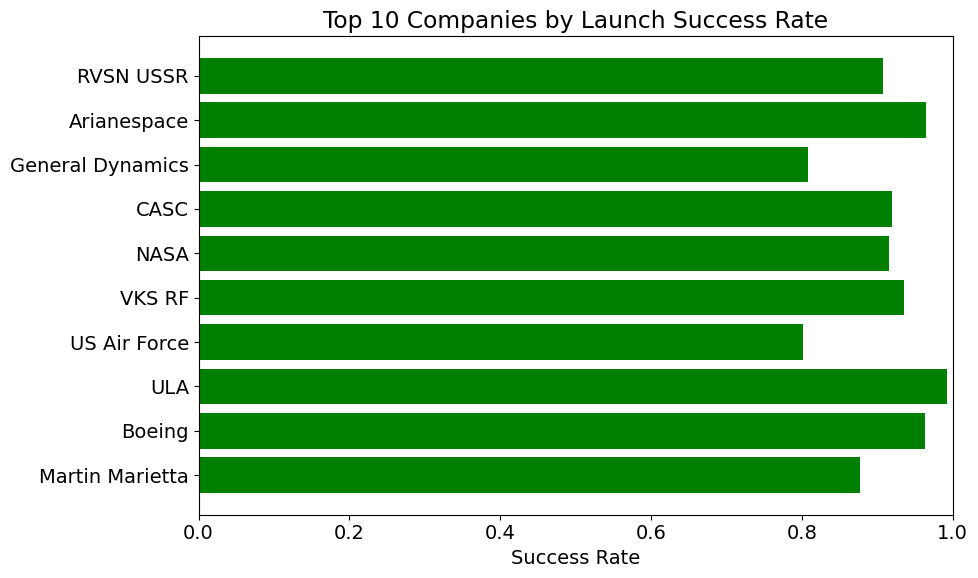

In [48]:
success_data = df[df['Status Mission'].notnull()]
company_success = success_data.groupby(['Company Name', 'Status Mission']).size().unstack(fill_value=0)
company_success['Total'] = company_success.sum(axis=1)
company_success['Success Rate'] = company_success.get('Success', 0) / company_success['Total']

top_success = company_success.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_success.index, top_success['Success Rate'], color='green')
plt.title("Top 10 Companies by Launch Success Rate")
plt.xlabel("Success Rate")
plt.xlim(0, 1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Top 10 Countries by Launch Count-
Russia and the USA dominate global launch activity, followed by Kazakhstan, France, and China. Even smaller countries like New Zealand and Iran appear due to hosting launch sites or emerging programs.

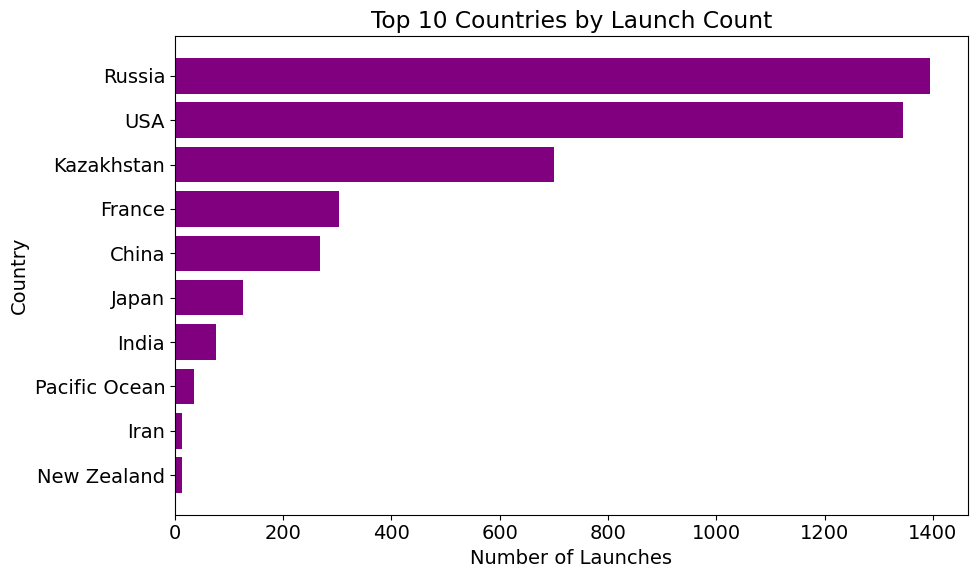

In [49]:
df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
launches_by_country = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(launches_by_country.index, launches_by_country.values, color='purple')
plt.title("Top 10 Countries by Launch Count")
plt.xlabel("Number of Launches")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Rocket Cost vs Mission Outcome-
Successful missions tend to have a higher cost range, suggesting higher investments may contribute to success. Failed or partial(other) missions also occur at various cost levels, so price alone isn't a guarantee of outcome.

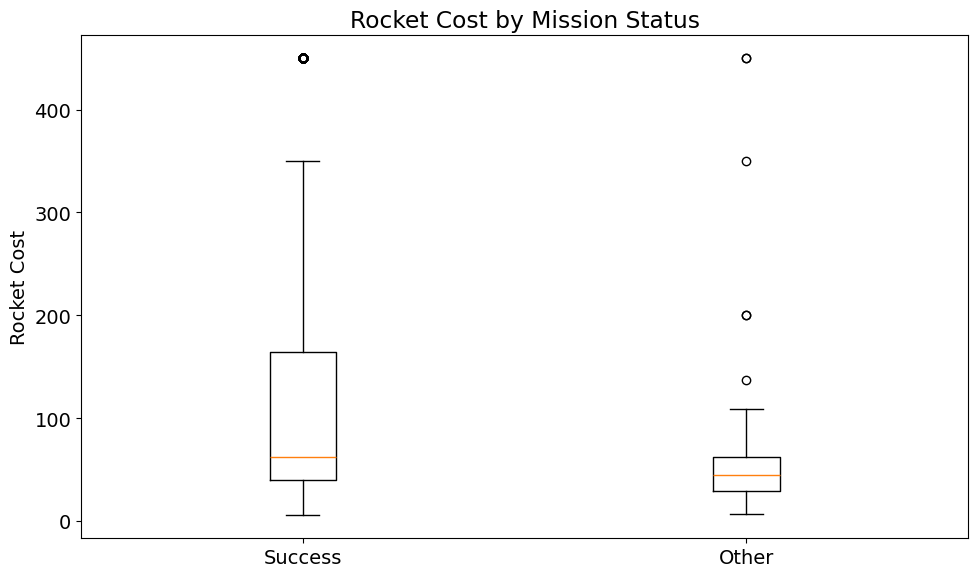

In [50]:
success_costs = cost_data[cost_data['Status Mission'] == 'Success']['Rocket']
fail_costs = cost_data[cost_data['Status Mission'] != 'Success']['Rocket']

plt.figure(figsize=(10, 6))
plt.boxplot([success_costs.dropna(), fail_costs.dropna()], tick_labels=['Success', 'Other'])
plt.title("Rocket Cost by Mission Status")
plt.ylabel("Rocket Cost")
plt.tight_layout()
plt.show()
